In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
#convert the data type of rate column to float and remove the denominator
def handlerate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [21]:
# to obtain the summary of data (There is no null value in data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

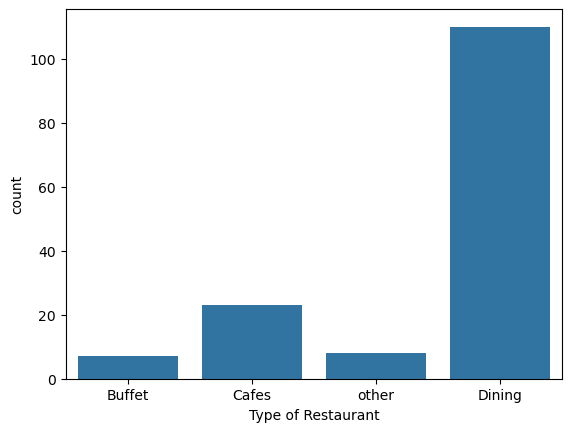

In [23]:
#explore the listed_in column
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

# Conclusion: The majority of the resturants fall into the dining category

Text(0, 0.5, 'votes')

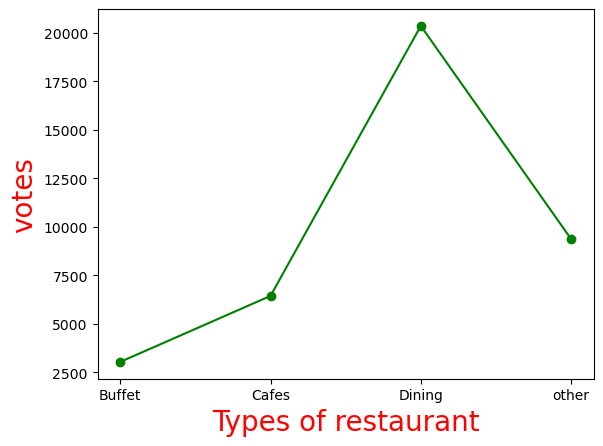

In [34]:
# group by 
gb=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':gb})
plt.plot(result,c='green',marker="o") 
plt.xlabel("Types of restaurant",c="red",size=20)
plt.ylabel("votes",c='red',size=20)

# conclusion: Dining resturants are preferred by a large number of individuals

In [49]:
#determine restaurant's name that received the maximum votes based on a given data
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']

print("Restaurant with maximum votes:")
restaurant_with_max_votes

Restaurant with maximum votes:


38    Empire Restaurant
Name: name, dtype: object

<Axes: xlabel='online_order', ylabel='count'>

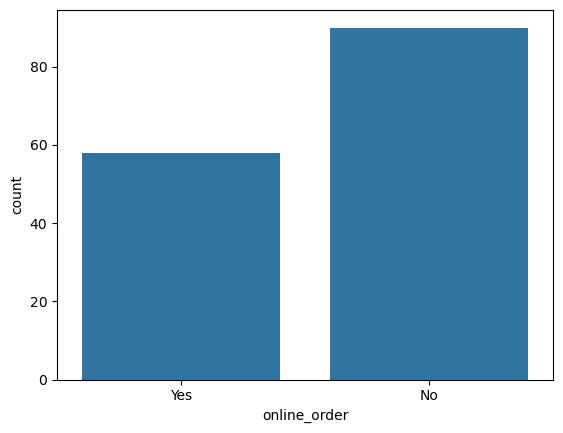

In [51]:
#explore the online order column 
sns.countplot(x=df['online_order'])

# Conclusion: This suggest that a majority of the restaurants do not accept online orders

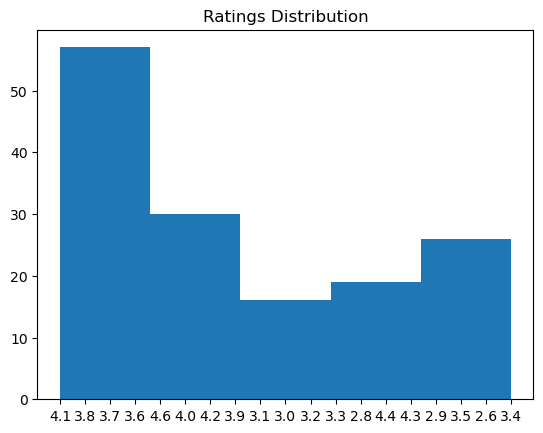

In [70]:
# explore the rate column 
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

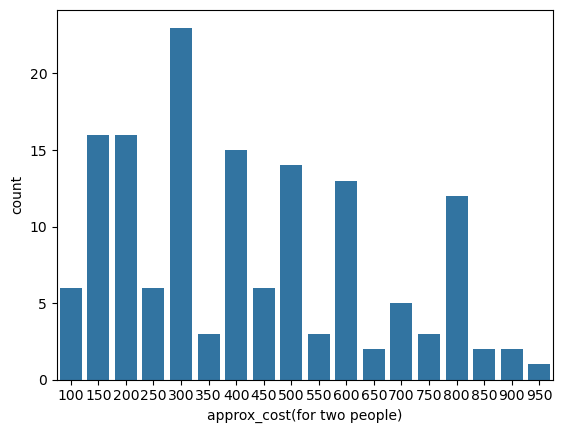

In [75]:
# explore the approx_cost(for two people) column 
sns.countplot(x=df['approx_cost(for two people)'])

# conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

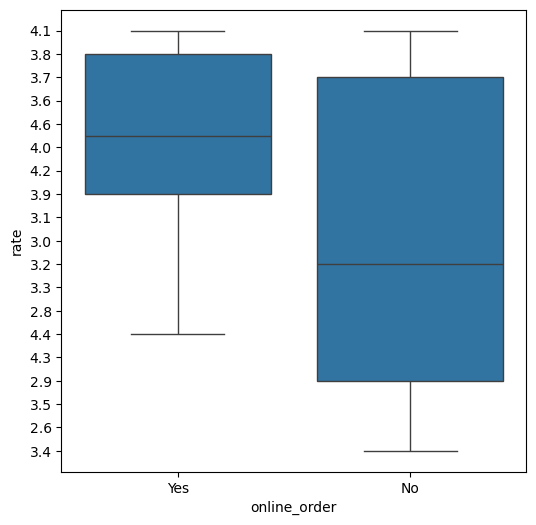

In [78]:
# examine whether online orders receive higher ratings than offline orders
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

# conclusion: offline orders received lower ratings in comparison to online orders, which obtained excellent ratings

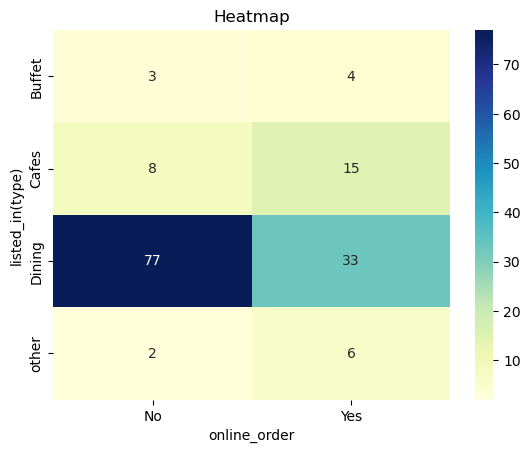

In [83]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()

# conclusion: dining restaurants primarily accept offline orders,whereas cafes primarily receive online orders this suggest that clients prefer to place orders in person at restaurants,but prefer online ordering at cafes

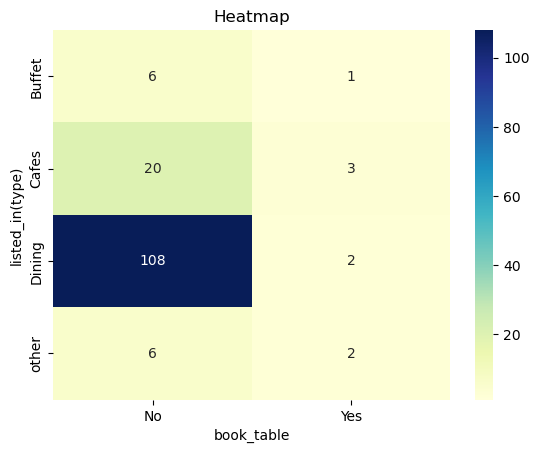

In [88]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='book_table',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel('book_table')
plt.ylabel('listed_in(type)')
plt.show()